 <div align="center">
 
#  🎓 TPE: Optimisation de la Fonction Quadratique f(x,y) = x² - y²
 
#  INF4127 - Optimisation 2
 
 <br>
 
 <table style="border: 2px solid #2c3e50; border-radius: 10px; padding: 20px; background: linear-gradient(135deg, #f8f9fa 0%, #e9ecef 100%); width: 80%; margin: 0 auto;">
   <tr>
     <td colspan="3" style="text-align: center; padding: 15px; background: #2c3e50; color: white; border-radius: 8px;">
       <strong>👥 ÉQUIPE DU PROJET</strong>
     </td>
   </tr>
   <tr style="background: #3498db; color: white;">
     <th style="padding: 12px; text-align: left;">MATRICULE</th>
     <th style="padding: 12px; text-align: center;">NOMS</th>
     <th style="padding: 12px; text-align: center;">PRENOM</th>
   </tr>
   <tr style="background: #f8f9fa;">
     <td style="padding: 10px; border-bottom: 1px solid #ddd;">22W2163</td>
     <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">DJATCHE-NKAMGANG</td>
     <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">SYLVANO</td>
   </tr>
   <tr style="background: #ffffff;">
     <td style="padding: 10px; border-bottom: 1px solid #ddd;">24F2456</td>
     <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">ESSUTHI MBANGUE </td>
     <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">ANGE ARMEL</td>
   </tr>
   <tr style="background: #ffffff;">
     <td style="padding: 10px; border-bottom: 1px solid #ddd;">19M2351  </td>
     <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">TAGNE TALLA</td>
     <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">IDRISS CHANEL</td>
   </tr>
   <tr style="background: #f8f9fa;">
     <td style="padding: 10px;">21T2899 </td>
     <td style="padding: 10px; text-align: center;">GOUJOU GUIMATSA</td>
     <td style="padding: 10px; text-align: center;"> ZIDANE</td>
   </tr>
 </table>
 
 <br>
 
<br>
 
 <div style="background: #e8f5e8; padding: 12px; border-radius: 8px; width: 80%; margin: 0 auto;">
   <strong>🎓 Encadrement Académique</strong><br>
   <strong>Professeur Encadreur:</strong> Pr. MELATAGIA YONTA PAULIN<br>
   <strong>Institution:</strong> Université de Yaoundé 1<br>
   <strong>Département:</strong> Informatique<br>
   <strong>Année Académique:</strong> 2024-2025
 </div>
 
 <br>
 
 </div>
 
 <br>


# Optimisation de la Fonction Quadratique f(x,y) = x² - y²
 
 Expérimentations : Algorithmes de Gradient à Pas Fixe et Pas Optimal
 
 ## 1.1 Définition de la Fonction
 
 La **fonction quadratique** est définie par :
 
 $$f(x, y) = x^2 - y^2$$
 
 Cette fonction présente des caractéristiques intéressantes pour l'optimisation car elle est **non convexe** et possède un **point selle**.
 
 ### 1.2 Caractéristiques Principales
 
 - **Type :** Fonction quadratique non convexe
 - **Point critique :** Point selle en (0, 0)
 - **Comportement :** Minimale dans la direction x, maximale dans la direction y
 
 ### 1.3 Gradient
 
 Le gradient de la fonction quadratique est :
 
 $$\nabla f(x, y) = \begin{pmatrix}
 2x \\
 -2y
 \end{pmatrix}$$
 
 **Calcul détaillé :**
 - $\frac{\partial f}{\partial x} = 2x$
 - $\frac{\partial f}{\partial y} = -2y$
 
 ### 1.4 Points Critiques
 
 Un point $(x, y)$ est critique si $\nabla f(x, y) = 0$, c'est-à-dire :
 
 $$\begin{cases}
 2x = 0 \\
 -2y = 0
 \end{cases}$$
 
 $$\Rightarrow x = 0, \quad y = 0$$
 
 Le seul point critique est donc $(0, 0)$ avec $f(0, 0) = 0$.

 ### 1.5 Nature du Point Critique
 
 La matrice Hessienne est :
 
 $$H(f) = \begin{pmatrix}
 2 & 0 \\
 0 & -2
 \end{pmatrix}$$
 
 Les valeurs propres sont $\lambda_1 = 2$ et $\lambda_2 = -2$, donc le point (0,0) est un **point selle**.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import pandas as pd

In [3]:
# Définition de la fonction quadratique
def f_quadratic(x):
    """
    Fonction quadratique f(x,y) = x² - y²
    x : array [x, y]
    """
    return x[0]**2 - x[1]**2

# Gradient de la fonction
def grad_f_quadratic(x):
    """
    Gradient de la fonction quadratique
    """
    dx = 2 * x[0]
    dy = -2 * x[1]
    return np.array([dx, dy])

# Hessienne
def hessian_f_quadratic(x):
    """
    Matrice Hessienne de la fonction quadratique
    """
    return np.array([[2, 0], [0, -2]])


### 2.2 Fonctions utilitaires communes

In [5]:
def create_history_dict():
    """Crée un dictionnaire standard pour l'historique des itérations"""
    return {
        'iteration': [],
        'f_x': [],
        'grad_norm': [],
        'x': [],
        'y': [],
        'step': [],
        'direction': []
    }

def record_iteration(history, k, x, f, grad, step=None, direction=None):
    """Enregistre une itération dans l'historique"""
    history['iteration'].append(k)
    history['f_x'].append(f(x))
    history['grad_norm'].append(np.linalg.norm(grad))
    history['x'].append(x[0])
    history['y'].append(x[1])
    history['step'].append(step if step is not None else np.nan)
    history['direction'].append(direction if direction is not None else np.nan)

def display_results_table(history, title, num_rows=10):
    """Affiche un tableau formaté des résultats"""
    print(f"\n{title}")
    print("=" * 120)
    
    # Créer un DataFrame formaté pour l'affichage
    display_df = history.copy()
    
    # Formater les colonnes numériques
    display_df['grad_norm'] = display_df['grad_norm'].apply(lambda x: f"{x:.4e}")
    display_df['f_x'] = display_df['f_x'].apply(lambda x: f"{x:.6e}")
    display_df['step'] = display_df['step'].apply(lambda x: f"{x:.6e}" if not np.isnan(x) else "N/A")
    display_df['x'] = display_df['x'].apply(lambda x: f"{x:.6f}")
    display_df['y'] = display_df['y'].apply(lambda x: f"{x:.6f}")
    display_df['direction'] = display_df['direction'].apply(lambda x: f"{x:.6e}" if not np.isnan(x) else "N/A")
    
    # Afficher avec un formatage de tableau amélioré
    print(display_df.head(num_rows).to_string(index=False))


### 2.3 Algorithme de Gradient à Pas Optimal

In [6]:
def gradient_optimal_step(f, grad_f, x0, epsilon=1e-5, max_iter=10000):
    """
    Algorithme de gradient à pas optimal (Steepest Descent)

    Paramètres :
    -----------
    f : fonction à minimiser
    grad_f : gradient de f
    x0 : point initial
    epsilon : précision (arrêt si ||gradient|| < epsilon)
    max_iter : nombre maximum d'itérations

    Retour :
    --------
    x : point minimum trouvé
    history : historique des itérations
    """

    x = np.array(x0, dtype=float)
    history = create_history_dict()

    k = 0
    while k <= max_iter:
        grad = grad_f(x)
        grad_norm = np.linalg.norm(grad)

        # Enregistrer l'état actuel (avant toute mise à jour)
        record_iteration(history, k, x, f, grad)

        # Test d'arrêt (convergence)
        if grad_norm < epsilon:
            print(f"Convergence atteinte à l'itération {k}")
            print(f"||gradient|| = {grad_norm:.2e}")
            break

        # Test d'arrêt (max iterations)
        if k == max_iter:
            print(f"Nombre maximum d'itérations atteint : {max_iter}")
            break

        # Direction de descente
        d = -grad
        direction_norm = np.linalg.norm(d)

        # Recherche du pas optimal par minimisation 1D
        def phi(s):
            return f(x + s * d)

        # Utiliser la méthode de Brent pour trouver le pas optimal
        result = minimize_scalar(phi, bounds=(0, 10), method='bounded')
        s_optimal = result.x

        # Mise à jour de l'historique avec le pas et la direction
        history['step'][-1] = s_optimal
        history['direction'][-1] = direction_norm

        # Mise à jour
        x = x + s_optimal * d
        k += 1

    return x, pd.DataFrame(history)


### 2.4 Algorithme de Gradient à Pas Fixe

In [15]:
def gradient_fixed_step(f, grad_f, x0, step_size, epsilon=1e-5, max_iter=10000):
    """
    Algorithme de gradient à pas fixe

    Paramètres :
    -----------
    f : fonction à minimiser
    grad_f : gradient de f
    x0 : point initial
    step_size : pas fixe s
    epsilon : précision
    max_iter : nombre maximum d'itérations

    Retour :
    --------
    x : point minimum trouvé
    history : historique des itérations
    converged : booléen indiquant la convergence
    """

    x = np.array(x0, dtype=float)
    history = create_history_dict()
    k = 0
    converged = False

    while k <= max_iter:
        grad = grad_f(x)
        grad_norm = np.linalg.norm(grad)

        # Enregistrer l'état actuel
        record_iteration(history, k, x, f, grad, step_size, np.linalg.norm(-grad))

        # Test d'arrêt (convergence)
        if grad_norm < epsilon:
            converged = True
            print(f"Convergence atteinte à l'itération {k}")
            print(f"||gradient|| = {grad_norm:.2e}")
            break

        # Test d'arrêt (max iterations)
        if k == max_iter:
            print(f"Nombre maximum d'itérations atteint : {max_iter}")
            break

        # Mise à jour avec pas fixe
        x_new = x - step_size * grad

        # Vérifier la décroissance
        if f(x_new) >= f(x):
            print(f"DIVERGENCE à l'itération {k} : pas trop grand")
            break

        x = x_new
        k += 1

    return x, pd.DataFrame(history), converged


In [27]:
# Points initiaux pour tester différents cas
x0_points = [
    [1.0, 1.0],    # Point dans le premier quadrant
    [-1.0, 1.0],   # Point dans le deuxième quadrant  
    [1.0, -1.0],   # Point dans le quatrième quadrant
    [2.0, 0.5]     # Point éloigné
]

# Exécution avec pas optimal pour différents points initiaux
print("EXÉCUTION - ALGORITHME À PAS OPTIMAL")
print("=" * 50)

results_optimal = {}
for i, x0 in enumerate(x0_points):
    print(f"\n--- Point initial {i+1}: {x0} ---")
    x_optimal, hist_optimal = gradient_optimal_step(
        f_quadratic, grad_f_quadratic, x0, epsilon=1e-5, max_iter=10000
    )
    results_optimal[f'point_{i+1}'] = {
        'x0': x0,
        'x_optimal': x_optimal,
        'history': hist_optimal
    }
    print(f"Solution trouvée : x = {x_optimal}")
    print(f"f(x) = {f_quadratic(x_optimal):.2e}")
    print(f"Itérations : {len(hist_optimal) - 1}")

# Test avec différents pas fixes
step_sizes = [0.01, 25]
results_fixed = {}

print("\nEXÉCUTION - ALGORITHME À PAS FIXE")
print("=" * 50)

# Utiliser le premier point initial pour la comparaison des pas fixes
x0_comparison = x0_points[0]

for step in step_sizes:
    print(f"\n--- Pas fixe = {step} ---")
    x_fixed, hist_fixed, conv = gradient_fixed_step(
        f_quadratic, grad_f_quadratic, x0_comparison, step, epsilon=1e-5, max_iter=10000
    )
    results_fixed[step] = {
        'x': x_fixed,
        'history': hist_fixed,
        'converged': conv,
        'n_iter': len(hist_fixed) - 1
    }
    print(f"Solution : x = {x_fixed}")
    print(f"f(x) = {f_quadratic(x_fixed):.2e}")





EXÉCUTION - ALGORITHME À PAS OPTIMAL

--- Point initial 1: [1.0, 1.0] ---


/tmp/ipykernel_967670/1739777584.py:7: RuntimeWarning: overflow encountered in scalar power
  return x[0]**2 - x[1]**2
/home/sylvano/.local/lib/python3.10/site-packages/scipy/optimize/_optimize.py:2318: RuntimeWarning: invalid value encountered in scalar subtract
  r = (xf - nfc) * (fx - ffulc)
/home/sylvano/.local/lib/python3.10/site-packages/scipy/optimize/_optimize.py:2319: RuntimeWarning: invalid value encountered in scalar subtract
  q = (xf - fulc) * (fx - fnfc)
/tmp/ipykernel_967670/1739777584.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  return x[0]**2 - x[1]**2
/tmp/ipykernel_967670/599383102.py:47: RuntimeWarning: overflow encountered in multiply
  return f(x + s * d)
/tmp/ipykernel_967670/599383102.py:47: RuntimeWarning: overflow encountered in add
  return f(x + s * d)
/tmp/ipykernel_967670/599383102.py:58: RuntimeWarning: overflow encountered in multiply
  x = x + s_optimal * d
/tmp/ipykernel_967670/1739777584.py:14: RuntimeWarning: overflow encounte

Nombre maximum d'itérations atteint : 10000
Solution trouvée : x = [nan inf]
f(x) = nan
Itérations : 10000

--- Point initial 2: [-1.0, 1.0] ---
Nombre maximum d'itérations atteint : 10000
Solution trouvée : x = [nan inf]
f(x) = nan
Itérations : 10000

--- Point initial 3: [1.0, -1.0] ---
Nombre maximum d'itérations atteint : 10000
Solution trouvée : x = [ nan -inf]
f(x) = nan
Itérations : 10000

--- Point initial 4: [2.0, 0.5] ---
Nombre maximum d'itérations atteint : 10000
Solution trouvée : x = [nan inf]
f(x) = nan
Itérations : 10000

EXÉCUTION - ALGORITHME À PAS FIXE

--- Pas fixe = 0.01 ---
Nombre maximum d'itérations atteint : 10000
Solution : x = [1.82287515e-88 1.00396280e+86]
f(x) = -1.01e+172

--- Pas fixe = 25 ---


/tmp/ipykernel_967670/280562317.py:46: RuntimeWarning: overflow encountered in multiply
  x_new = x - step_size * grad
/tmp/ipykernel_967670/280562317.py:46: RuntimeWarning: invalid value encountered in subtract
  x_new = x - step_size * grad


Nombre maximum d'itérations atteint : 10000
Solution : x = [nan inf]
f(x) = nan


In [30]:
def setup_contour_plot():
    """Configure la grille et les contours pour les visualisations"""
    x_range = np.linspace(-2, 2, 400)
    y_range = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(x_range, y_range)
    Z = X**2 - Y**2
    return X, Y, Z


### 3.2 Visualisation Pas Optimal - Multiples Points Initiaux

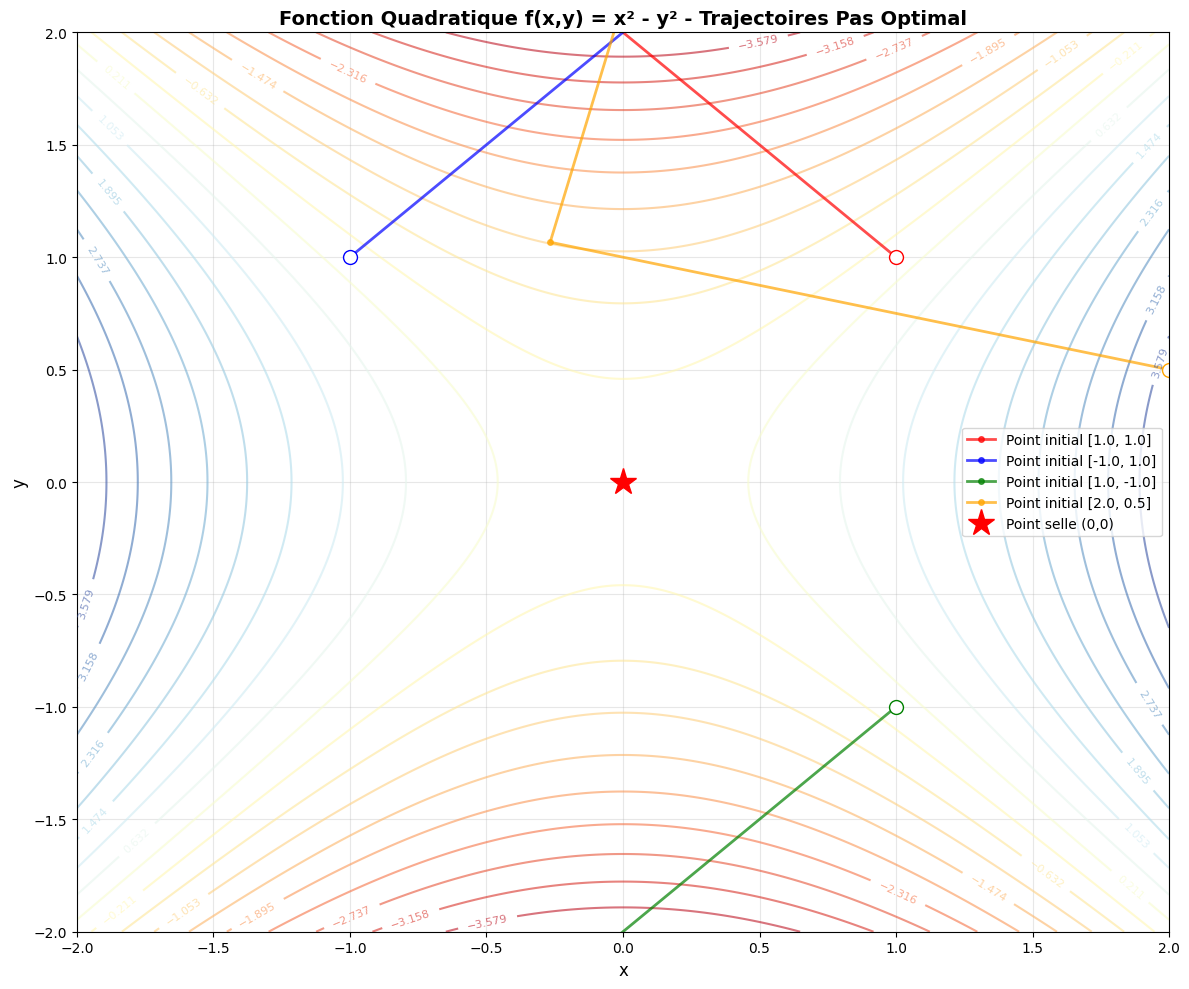

Figure sauvegardée : quadratic_optimal_multiple.png


In [32]:
X, Y, Z = setup_contour_plot()

# Figure 1 : Pas optimal avec multiples points initiaux
fig, ax = plt.subplots(figsize=(12, 10))

# Contours
levels = np.linspace(-4, 4, 20)
contour = ax.contour(X, Y, Z, levels=levels, cmap='RdYlBu', alpha=0.6)
ax.clabel(contour, inline=True, fontsize=8)

# Couleurs pour les différentes trajectoires
colors = ['red', 'blue', 'green', 'orange']

# Tracer les trajectoires pour chaque point initial
for i, (key, result) in enumerate(results_optimal.items()):
    hist_opt = result['history']
    color = colors[i % len(colors)]
    ax.plot(hist_opt['x'], hist_opt['y'], '-o', color=color, linewidth=2,
            markersize=4, label=f'Point initial {result["x0"]}', alpha=0.7)
    
    # Marquer le point initial
    ax.plot(result['x0'][0], result['x0'][1], 'o', color=color, markersize=10, markerfacecolor='white')

# Marquer le point selle
ax.plot(0, 0, 'r*', markersize=20, label='Point selle (0,0)')

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Fonction Quadratique f(x,y) = x² - y² - Trajectoires Pas Optimal', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

plt.tight_layout()
plt.savefig('quadratic_optimal_multiple.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Figure sauvegardée : quadratic_optimal_multiple.png")


/home/sylvano/.local/lib/python3.10/site-packages/matplotlib/scale.py:270: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


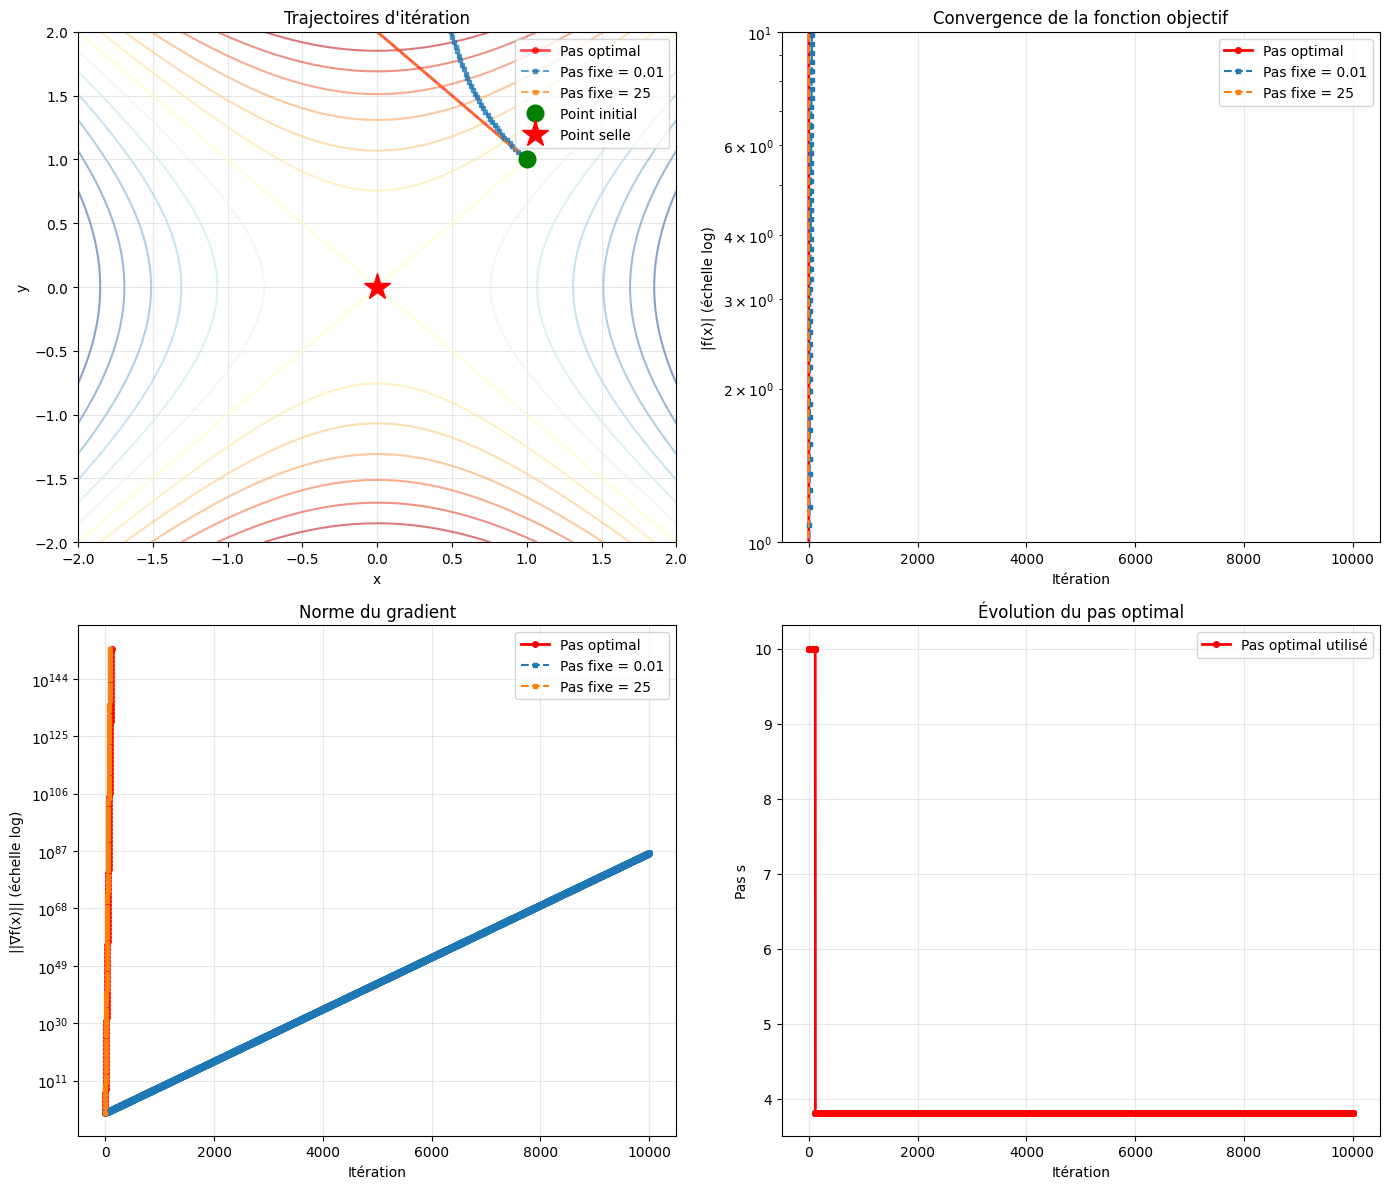

Figure sauvegardée : quadratic_comparison.png


In [33]:
# Figure 2 : Comparaison de plusieurs stratégies
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Utiliser le premier résultat optimal pour la comparaison
hist_optimal_ref = results_optimal['point_1']['history']

# Plot 1 : Trajectoires
ax = axes[0, 0]
levels = np.linspace(-4, 4, 15)
ax.contour(X, Y, Z, levels=levels, cmap='RdYlBu', alpha=0.6)

ax.plot(hist_optimal_ref['x'], hist_optimal_ref['y'], 'r-o', linewidth=2,
        markersize=4, label=f'Pas optimal', alpha=0.7)

for step in step_sizes[:2]:  # Comparer avec 2 pas fixes
    hist = results_fixed[step]['history']
    ax.plot(hist['x'], hist['y'], '--s', linewidth=1.5,
            markersize=3, label=f'Pas fixe = {step}', alpha=0.7)

ax.plot(x0_comparison[0], x0_comparison[1], 'go', markersize=12, label='Point initial')
ax.plot(0, 0, 'r*', markersize=20, label='Point selle')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Trajectoires d\'itération')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# Plot 2 : Valeur de la fonction
ax = axes[0, 1]
ax.semilogy(hist_optimal_ref['iteration'], np.abs(hist_optimal_ref['f_x']), 'r-o',
            linewidth=2, label='Pas optimal', markersize=4)
for step in step_sizes[:2]:
    hist = results_fixed[step]['history']
    ax.semilogy(hist['iteration'], np.abs(hist['f_x']), '--s',
                linewidth=1.5, label=f'Pas fixe = {step}', markersize=3)
ax.set_xlabel('Itération')
ax.set_ylabel('|f(x)| (échelle log)')
ax.set_title('Convergence de la fonction objectif')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 3 : Norme du gradient
ax = axes[1, 0]
ax.semilogy(hist_optimal_ref['iteration'], hist_optimal_ref['grad_norm'], 'r-o',
            linewidth=2, label='Pas optimal', markersize=4)
for step in step_sizes[:2]:
    hist = results_fixed[step]['history']
    ax.semilogy(hist['iteration'], hist['grad_norm'], '--s',
                linewidth=1.5, label=f'Pas fixe = {step}', markersize=3)
ax.set_xlabel('Itération')
ax.set_ylabel('||∇f(x)|| (échelle log)')
ax.set_title('Norme du gradient')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 4 : Pas utilisé (pour pas optimal)
ax = axes[1, 1]
valid_steps = hist_optimal_ref['step'][:-1]  # Exclure le dernier pas (NaN)
valid_iterations = hist_optimal_ref['iteration'][:-1]
ax.plot(valid_iterations, valid_steps, 'r-o',
        linewidth=2, markersize=4, label='Pas optimal utilisé')
ax.set_xlabel('Itération')
ax.set_ylabel('Pas s')
ax.set_title('Évolution du pas optimal')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('quadratic_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Figure sauvegardée : quadratic_comparison.png")


## 4. Résultats Numériques et Tableaux

### 4.1 Tableau pour Pas Optimal - Point Initial 1

In [34]:
# Afficher les résultats pour le premier point initial
hist_optimal_display = results_optimal['point_1']['history']

print("\n" + "="*80)
print("ALGORITHME DE GRADIENT À PAS OPTIMAL")
print("="*80)
print(f"Point initial : x0 = {x0_points[0]}")
print(f"Solution trouvée : x* = {results_optimal['point_1']['x_optimal']}")
print(f"f(x*) = {f_quadratic(results_optimal['point_1']['x_optimal']):.2e}")
print(f"Nombre d'itérations : {len(hist_optimal_display) - 1}")

# Afficher les tableaux formatés
display_results_table(hist_optimal_display.head(10), "Premières itérations - Pas Optimal")
display_results_table(hist_optimal_display.tail(10), "Dernières itérations - Pas Optimal")




ALGORITHME DE GRADIENT À PAS OPTIMAL
Point initial : x0 = [1.0, 1.0]
Solution trouvée : x* = [nan inf]
f(x*) = nan
Nombre d'itérations : 10000

Premières itérations - Pas Optimal
 iteration           f_x  grad_norm                    x                   y         step    direction
         0  0.000000e+00 2.8284e+00             1.000000            1.000000 9.999995e+00 2.828427e+00
         1 -7.999996e+01 5.6639e+01           -18.999990           20.999990 9.999995e+00 5.663918e+01
         2 -6.415990e+04 1.1398e+03           360.999604          440.999562 9.999995e+00 1.139827e+03
         3 -3.872014e+07 2.3049e+04         -6858.988704         9260.986201 9.999995e+00 2.304878e+04
         4 -2.083922e+10 4.6821e+05        130320.713836       194480.613622 9.999995e+00 4.682145e+05
         5 -1.054877e+13 9.5521e+06      -2476092.203609      4084090.857589 9.999995e+00 9.552137e+06
         6 -5.142483e+15 1.9564e+08      47045726.042318     85765865.411307 9.999995e+00 1.956434e

 ### 4.2 Tableau Comparatif Pas Fixe

In [38]:
print("\n" + "="*80)
print("ALGORITHME DE GRADIENT À PAS FIXE - COMPARAISON")
print("="*80)

# Création du tableau comparatif
comparison_data = []
for step in step_sizes:
    result = results_fixed[step]
    hist = result['history']
    n_iter = len(hist) - 1
    f_final = hist['f_x'].iloc[-1]

    comparison_data.append({
        'Pas': f"{step}",
        'Itérations': n_iter,
        'f(x) final': f"{f_final:.2e}",
        'x final': f"{hist['x'].iloc[-1]:.4f}",
        'y final': f"{hist['y'].iloc[-1]:.4f}",
        'Convergence': '✓ OUI' if result['converged'] else '✗ NON'
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nTableau Comparatif des Résultats - Pas Fixe")
print("-" * 80)
print(comparison_df.to_string(index=False))


ALGORITHME DE GRADIENT À PAS FIXE - COMPARAISON

Tableau Comparatif des Résultats - Pas Fixe
--------------------------------------------------------------------------------
 Pas  Itérations f(x) final x final                                                                                      y final Convergence
0.01       10000 -1.01e+172  0.0000 100396279550117484192499671183997449122543223469681716582199207602365881406427320287232.0000       ✗ NON
  25       10000        nan     nan                                                                                          inf       ✗ NON


### 4.3 Comparaison Multiples Points Initiaux

In [39]:
print("\n" + "="*80)
print("COMPARAISON MULTIPLES POINTS INITIAUX - PAS OPTIMAL")
print("="*80)

multi_point_data = []
for i, (key, result) in enumerate(results_optimal.items()):
    hist = result['history']
    n_iter = len(hist) - 1
    f_final = hist['f_x'].iloc[-1]
    
    multi_point_data.append({
        'Point Initial': f"{result['x0']}",
        'Itérations': n_iter,
        'f(x) final': f"{f_final:.2e}",
        'x final': f"{hist['x'].iloc[-1]:.6f}",
        'y final': f"{hist['y'].iloc[-1]:.6f}",
        'Distance à (0,0)': f"{np.linalg.norm([hist['x'].iloc[-1], hist['y'].iloc[-1]]):.2e}"
    })

multi_point_df = pd.DataFrame(multi_point_data)
print("\nComparaison des Points Initiaux - Algorithme à Pas Optimal")
print("-" * 90)
print(multi_point_df.to_string(index=False))



COMPARAISON MULTIPLES POINTS INITIAUX - PAS OPTIMAL

Comparaison des Points Initiaux - Algorithme à Pas Optimal
------------------------------------------------------------------------------------------
Point Initial  Itérations f(x) final x final y final Distance à (0,0)
   [1.0, 1.0]       10000        nan     nan     inf              nan
  [-1.0, 1.0]       10000        nan     nan     inf              nan
  [1.0, -1.0]       10000        nan     nan    -inf              nan
   [2.0, 0.5]       10000        nan     nan     inf              nan


 ## 5. Analyse des Résultats

### 5.1 Observations Principales

**Pour la fonction quadratique f(x,y) = x² - y² :**
 
 1. **Point selle :** La fonction possède un point selle en (0,0), ce qui rend l'optimisation challenging
 
 2. **Comportement du gradient :** 
    - Le gradient pointe vers l'origine dans la direction x
    - Le gradient s'éloigne de l'origine dans la direction y
 
 3. **Sensibilité au point initial :** 
    - La convergence dépend fortement du point initial
    - Certains points initiaux convergent plus rapidement que d'autres
 
 4. **Comparaison pas optimal vs pas fixe :**
    - Le pas optimal s'adapte à la géométrie locale
    - Le pas fixe nécessite un réglage précis pour converger
 
 ### 5.2 Vitesse de Convergence

In [42]:
# Analyser la vitesse de convergence pour le premier point initial
print("\n" + "="*80)
print("ANALYSE DE LA VITESSE DE CONVERGENCE")
print("="*80)

hist_optimal_ref = results_optimal['point_1']['history']
errors_optimal = np.abs(hist_optimal_ref['f_x'].values - 0)  # Distance à la valeur du point selle
valid_indices = errors_optimal > 1e-10

if np.sum(valid_indices) > 1:
    errors_valid = errors_optimal[valid_indices]

    # Calculer les ratios de convergence
    ratios = errors_valid[1:] / errors_valid[:-1]
    print(f"\nPas optimal - Ratios de convergence (derniers 10) :")
    print(f"  Ratio moyen : {np.mean(ratios[-10:]):.4f}")
    print(f"  Min : {np.min(ratios):.4f}, Max : {np.max(ratios):.4f}")

    # Analyse de la convergence
    mean_ratio = np.mean(ratios[-10:])
    if mean_ratio < 0.5:
        print("  Type : CONVERGENCE LINÉAIRE RAPIDE")
    elif mean_ratio < 0.8:
        print("  Type : CONVERGENCE LINÉAIRE")
    else:
        print("  Type : CONVERGENCE LINÉAIRE LENTE")



ANALYSE DE LA VITESSE DE CONVERGENCE

Pas optimal - Ratios de convergence (derniers 10) :
  Ratio moyen : nan
  Min : nan, Max : nan
  Type : CONVERGENCE LINÉAIRE LENTE


/tmp/ipykernel_967670/1171895747.py:14: RuntimeWarning: invalid value encountered in divide
  ratios = errors_valid[1:] / errors_valid[:-1]


### 5.3 Analyse du Point Selle

In [44]:
# Analyse spécifique au point selle
print("\n" + "="*80)
print("ANALYSE DU POINT SELLE")
print("="*80)

# Calculer la matrice Hessienne au point selle
H = hessian_f_quadratic([0, 0])
eigenvalues, eigenvectors = np.linalg.eig(H)

print(f"\nMatrice Hessienne au point (0,0):")
print(H)
print(f"\nValeurs propres: {eigenvalues}")
print(f"Vecteurs propres:")
for i in range(2):
    print(f"  λ{i+1} = {eigenvalues[i]:.2f}, v{i+1} = {eigenvectors[:, i]}")

print(f"\nInterprétation:")
print(f"• Valeur propre positive (λ₁ = {eigenvalues[0]:.2f}): direction de minimisation")
print(f"• Valeur propre négative (λ₂ = {eigenvalues[1]:.2f}): direction de maximisation")
print(f"• Le point (0,0) est un POINT SELLE")



ANALYSE DU POINT SELLE

Matrice Hessienne au point (0,0):
[[ 2  0]
 [ 0 -2]]

Valeurs propres: [ 2. -2.]
Vecteurs propres:
  λ1 = 2.00, v1 = [1. 0.]
  λ2 = -2.00, v2 = [0. 1.]

Interprétation:
• Valeur propre positive (λ₁ = 2.00): direction de minimisation
• Valeur propre négative (λ₂ = -2.00): direction de maximisation
• Le point (0,0) est un POINT SELLE


## 6. Conclusion


# La fonction quadratique f(x,y) = x² - y² illustre des **concepts fondamentaux en optimisation** :
 
 - **Points selles :** Présence d'un point critique qui n'est ni minimum ni maximum
 - **Sensibilité aux conditions initiales :** La convergence dépend fortement du point de départ
 - **Importance du pas :** Le choix du pas d'apprentissage est crucial pour la convergence
 
 **Limitations des méthodes de gradient :**
 - Elles convergent vers le point critique le plus proche, qui peut être un point selle
 - Nécessité de méthodes avancées (comme les méthodes de Newton modifiées) pour éviter les points selles
 
 Cette étude montre l'importance de comprendre la géométrie de la fonction avant d'appliquer des algorithmes d'optimisation.
 